# Урок 6. Градиентный бустинг (AdaBoost)

**Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.**

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [41]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [42]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [48]:
def bias(y, z):
    return 2*(y - z)

In [44]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [45]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [46]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Количество деревьев: 3


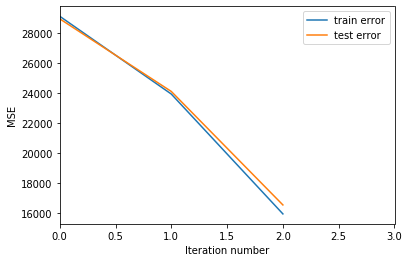

Количество деревьев: 5


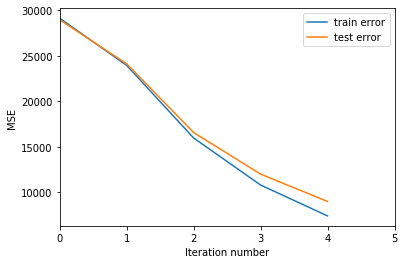

Количество деревьев: 10


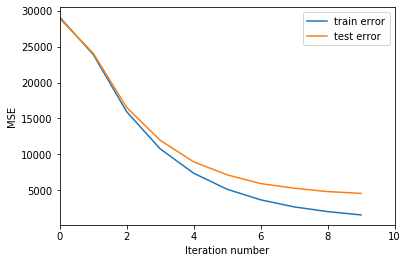

Количество деревьев: 15


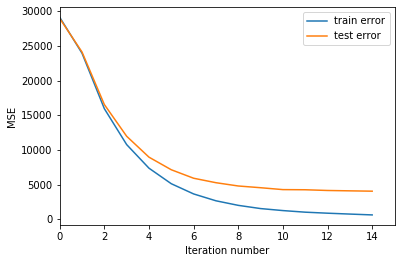

Количество деревьев: 20


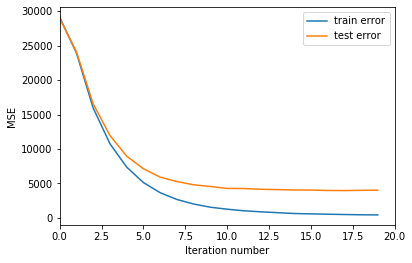

Количество деревьев: 25


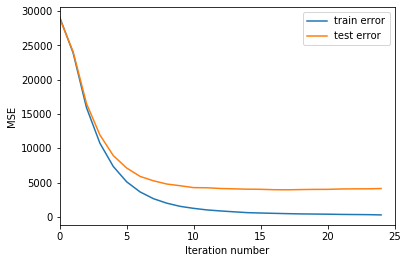

In [53]:
# Число деревьев в ансамбле
numbers_trees = [3, 5, 10, 15, 20, 25]
max_depth = 5
eta = 0.1

for n in numbers_trees:
    coefs = [1] * n
    
    trees, train_errors, test_errors = gb_fit(n, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    print(f'Количество деревьев: {n}')
    get_error_plot(n, train_errors, test_errors)

In [54]:
test_errors

[28946.1981981982,
 24106.49156899774,
 16544.732287855815,
 11972.514618048417,
 8962.011490720293,
 7147.873566406381,
 5926.729148300138,
 5282.941970180734,
 4810.500692555494,
 4560.92265162657,
 4287.92511749739,
 4267.135220977076,
 4163.28908024027,
 4110.914698946387,
 4061.8261023516625,
 4043.8023559239646,
 3985.498994701753,
 3971.2623853211085,
 4004.1224885004995,
 4031.4735636461537,
 4035.6544964478194,
 4090.780522835629,
 4110.8918108098005,
 4113.238121322645,
 4154.452223755386]

eta: 0.1
Максимальная глубина деревьев: 3


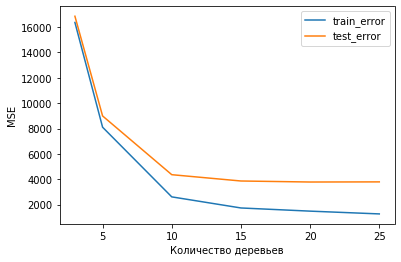

In [73]:
# зависимость mse от числа деревьев в ансамбле
numbers_trees = [3, 5, 10, 15, 20, 25]
max_depth = 3
eta = 0.1
train_err_list = []
test_err_list = []
for n in numbers_trees:
    coefs = [1] * n
    
    trees, train_errors, test_errors = gb_fit(n, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_err_list.append(train_errors[-1])
    test_err_list.append(test_errors[-1])
    
print(f'eta: {eta}')
print(f'Максимальная глубина деревьев: {max_depth}')
xx = numbers_trees
y1 = train_err_list
plt.plot(xx, y1, label = 'train_error')
y2 = test_err_list                    
plt.plot(xx, y2, label = 'test_error')
    
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')

plt.legend()            

eta: 0.1
Количество деревьев: 10


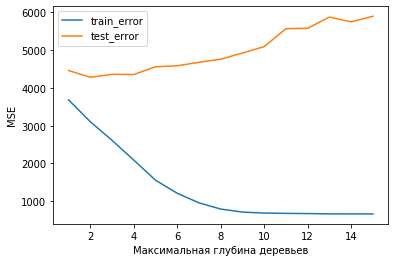

In [75]:
# зависимость mse от максимальной глубины деревьев

n_trees = 10
coefs = [1] * n_trees
max_depth_list = range(1, 16)

eta = 0.1
train_err_list = []
test_err_list = []
for m in max_depth_list:
    
    
    trees, train_errors, test_errors = gb_fit(n_trees, m, X_train, X_test, y_train, y_test, coefs, eta)
    train_err_list.append(train_errors[-1])
    test_err_list.append(test_errors[-1])
    
print(f'eta: {eta}')
print(f'Количество деревьев: {n_trees}')
xx = max_depth_list
y1 = train_err_list
plt.plot(xx, y1, label = 'train_error')
y2 = test_err_list                    
plt.plot(xx, y2, label = 'test_error')
    
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('MSE')

plt.legend()                           

eta: 0.1
Количество деревьев: 20


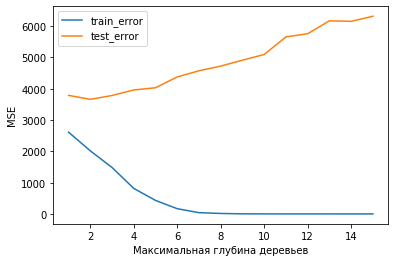

In [76]:
# зависимость mse от максимальной глубины деревьев

n_trees = 20
coefs = [1] * n_trees
max_depth_list = range(1, 16)

eta = 0.1
train_err_list = []
test_err_list = []
for m in max_depth_list:
    
    
    trees, train_errors, test_errors = gb_fit(n_trees, m, X_train, X_test, y_train, y_test, coefs, eta)
    train_err_list.append(train_errors[-1])
    test_err_list.append(test_errors[-1])
    
print(f'eta: {eta}')
print(f'Количество деревьев: {n_trees}')
xx = max_depth_list
y1 = train_err_list
plt.plot(xx, y1, label = 'train_error')
y2 = test_err_list                    
plt.plot(xx, y2, label = 'test_error')
    
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('MSE')

plt.legend()                           

**Выводы: при количестве деревьев больше 20 ошибка выходит на ассимптоту, а при увеличении глубины увеличивается и переобучение. Минимальная ошибка на тесте наблюдается при количестве деревьев 20-25 и при глубине деревьев = 2**